In [2]:
!nvidia-smi

Sat Dec 28 23:19:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   61C    P0              10W /  35W |    360MiB /  4096MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/home/hasnan/Downloads/Notebook/Licence


In [6]:
!pip install ultralytics

In [10]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.34 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3904MiB)
Setup complete ✅ (12 CPUs, 15.3 GB RAM, 183.2/361.0 GB disk)


In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gMjdystbA1QyBSj7ghNQ")
project = rf.workspace("brac-university-0lil8").project("license-plate-detection-5o8n3")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-detection-5 in yolov8:: 100%|██████████| 37052/37052 [00:02<00:00, 17237.59it/s]


In [122]:
!yolo task=detect mode=train model=yolov8n.pt data=/home/hasnan/Downloads/Notebook/Licence/License-Plate-detection-5/data.yaml epochs=30 imgsz=640

/home/hasnan/anaconda3/lib/python3.12/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ne

In [124]:
!pip install matplotlib
!pip install opencv-python

In [126]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

In [128]:
!yolo val model=/home/hasnan/Downloads/Notebook/Licence/runs/detect/train2/weights/best.pt data=/home/hasnan/Downloads/Notebook/Licence/License-Plate-detection-5/data.yaml imgsz=640

/home/hasnan/anaconda3/lib/python3.12/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ul

In [130]:
!yolo val model=/home/hasnan/Downloads/Notebook/Licence/runs/detect/train2/weights/best.pt data=/home/hasnan/Downloads/Notebook/Licence/License-Plate-detection-5/data.yaml imgsz=640 split=test

/home/hasnan/anaconda3/lib/python3.12/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ul

In [134]:
model = YOLO('/home/hasnan/Downloads/Notebook/Licence/runs/detect/train3/weights/best.pt')

In [136]:
test_image_path = '/home/hasnan/Downloads/Notebook/Licence/License-Plate-detection-5/test/images/11_jpg.rf.ca0b5f22029b23035e8e3582409e428c.jpg'

In [140]:
results = model(test_image_path)


image 1/1 /home/hasnan/Downloads/Notebook/Licence/License-Plate-detection-5/test/images/11_jpg.rf.ca0b5f22029b23035e8e3582409e428c.jpg: 640x640 1 0, 7.9ms
Speed: 3.3ms preprocess, 7.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


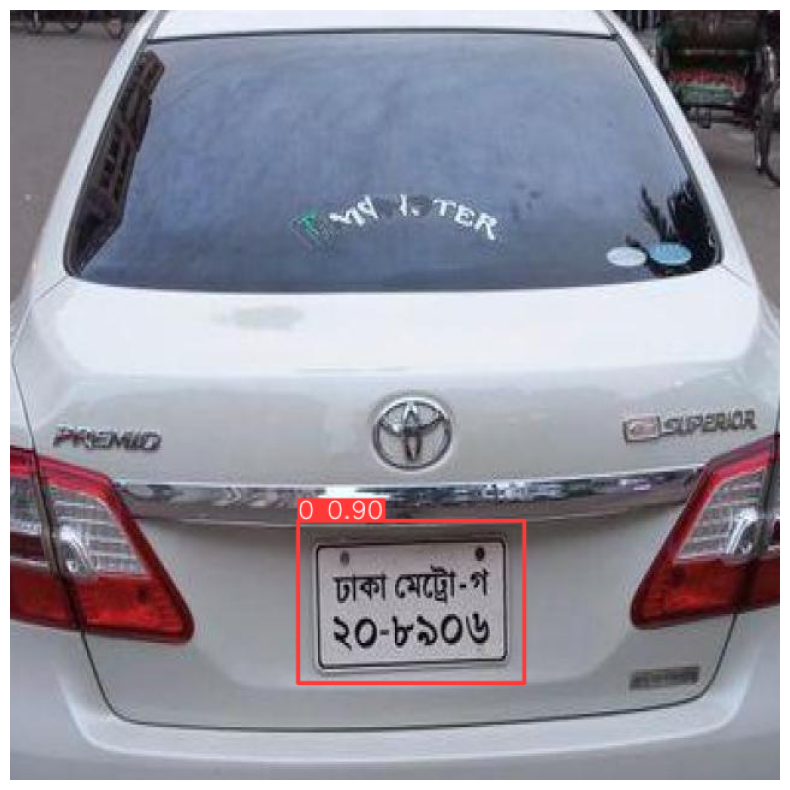

In [142]:
annotated_image = results[0].plot()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [70]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.6 MB/s eta 0:00:007.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.4 MB/s eta 0:00:00 MB/s eta 0:00:01


In [72]:
import easyocr

In [74]:
reader = easyocr.Reader(['bn'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [92]:
processed_image_path = results[0].path

In [94]:
easyocr_results = reader.readtext(processed_image_path)

In [96]:
print(processed_image_path)

/home/hasnan/Downloads/Notebook/Licence/License-Plate-detection-5/test/images/11_jpg.rf.ca0b5f22029b23035e8e3582409e428c.jpg


In [98]:
for (bbox, text, confidence) in easyocr_results:
    print(f"Text: {text}, Confidence: {confidence:.2f}")

Text: 74, Confidence: 0.18
Text: 1512701, Confidence: 0.03
Text: ঢাকা মেট্রৌ-গ, Confidence: 0.53
Text: ২০-৮৯০৬, Confidence: 0.75
Text: ঢ৮ং, Confidence: 0.08


In [144]:
!pip install easyocr matplotlib ultralytics opencv-python pillow

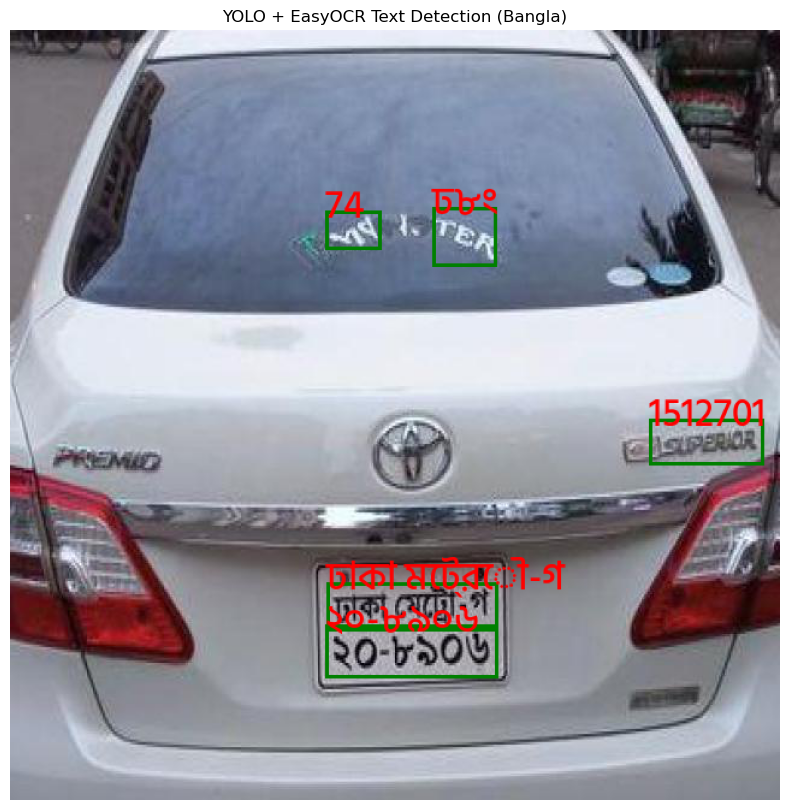

In [146]:
from PIL import Image, ImageDraw, ImageFont
image = cv2.imread(processed_image_path)
reader = easyocr.Reader(['bn'])
easyocr_results = reader.readtext(processed_image_path)
image = cv2.imread(processed_image_path)
bangla_font_path = "/home/hasnan/Downloads/Notebook/Licence/HindSiliguri-Medium.ttf"
font = ImageFont.truetype(bangla_font_path, size=32)

image = Image.open(processed_image_path)
draw = ImageDraw.Draw(image)
# Draw bounding boxes and Bangla text on the image
for (bbox, text, confidence) in easyocr_results:
    # Define bounding box
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    
    # Draw the bounding box
    draw.rectangle([top_left, bottom_right], outline="green", width=3)
    
    # Draw Bangla text with PIL
    draw.text((top_left[0], top_left[1] - 30), text, fill="red", font=font)

# Convert the image back to a format compatible with Matplotlib
image_rgb = image.convert("RGB")

# Display the image with bounding boxes and Bangla text
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.title("YOLO + EasyOCR Text Detection (Bangla)")
plt.show()

In [152]:
!pip install numpy

In [162]:
import cv2
import easyocr
from PIL import Image, ImageDraw, ImageFont
from ultralytics import YOLO
import numpy as np

# Load YOLO model
model = YOLO('/home/hasnan/Downloads/Notebook/Licence/runs/detect/train3/weights/best.pt')  # Replace 'best.pt' with your trained YOLO model

video_path = '/home/hasnan/Downloads/Notebook/video_2024-12-29_11-33-13.mp4'
output_video_path = '/home/hasnan/Downloads/Notebook/test.mp4'

# Initialize EasyOCR reader for Bangla
reader = easyocr.Reader(['bn'])

# Path to Bangla font
bangla_font_path = "/home/hasnan/Downloads/Notebook/Licence/HindSiliguri-Medium.ttf"
font = ImageFont.truetype(bangla_font_path, size=32)

# Open the video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Initialize a set to store detected license plate texts
unique_texts = set()

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to PIL Image for EasyOCR and text rendering
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_image)

    # Process the frame with YOLO
    results = model(frame)

    # Get detections from YOLO
    for result in results:
        boxes = result.boxes.xyxy  # Bounding box coordinates (x_min, y_min, x_max, y_max)
        for box in boxes:
            x_min, y_min, x_max, y_max = map(int, box[:4])

            # Crop the region for OCR
            cropped = frame[y_min:y_max, x_min:x_max]

            # Run EasyOCR on the cropped region
            ocr_results = reader.readtext(cropped)

            # Draw bounding box and OCR text
            draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="green", width=3)
            for (_, text, _) in ocr_results:
                draw.text((x_min, y_min - 30), text, fill="red", font=font)

                # Add text to the set if not already present
                if text not in unique_texts:
                    unique_texts.add(text)

    # Convert the PIL image back to a NumPy array
    processed_frame = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

    # Write the processed frame to the output video
    out.write(processed_frame)

# Release resources
cap.release()
out.release()

# Convert the set to a list for display or further processing
detected_texts = list(unique_texts)

# Print the unique detected license plate texts
print("Unique Detected License Plate Texts:")
print(detected_texts)

print(f"Processed video saved at: {output_video_path}")


0: 640x640 1 0, 5.4ms
Speed: 2.0ms preprocess, 5.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 5.5ms
Speed: 1.7ms preprocess, 5.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 5.5ms
Speed: 1.7ms preprocess, 5.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 5.7ms
Speed: 1.9ms preprocess, 5.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 5.6ms
Speed: 1.7ms preprocess, 5.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 5.8ms
Speed: 1.7ms preprocess, 5.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 5.5ms
Speed: 2.1ms preprocess, 5.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 5.7ms
Speed: 1.9ms preprocess, 